Estimated parameters: α = 0.0260, β = 1.7713


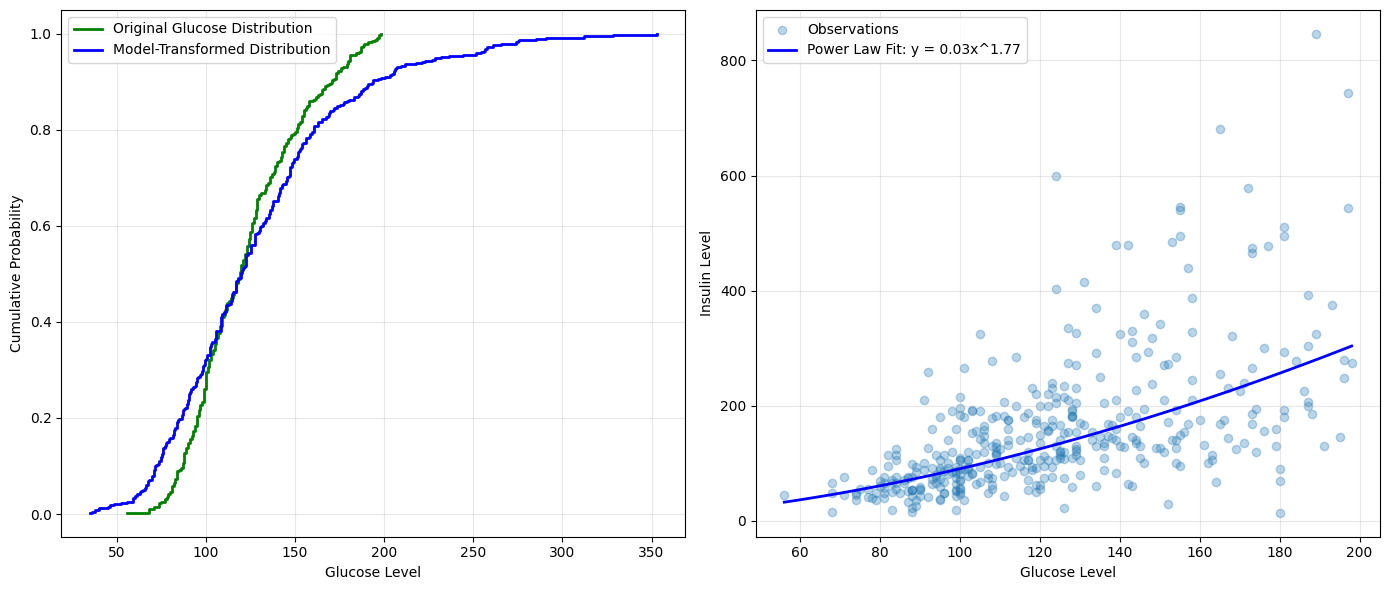


Kolmogorov-Smirnov Test Results:
Test Statistic D = 0.1154
Critical Value (α=0.05) = 0.0970
Conclusion: Distributions are different (model is inadequate)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

diabetes_data = pd.read_csv('diabetes.csv')
clean_data = diabetes_data[(diabetes_data['Glucose'] > 0) & (diabetes_data['Insulin'] > 0)]
glucose_values = clean_data['Glucose'].values
insulin_values = clean_data['Insulin'].values

def fit_power_law(x_data, y_data):
    """Fit power law model y = a*x^b to the data"""
    log_x = np.log(x_data)
    log_y = np.log(y_data)
    
    beta = np.cov(log_x, log_y)[0,1] / np.var(log_x)
    alpha = np.exp(np.mean(log_y) - beta*np.mean(log_x))
    
    return alpha, beta

alpha, beta = fit_power_law(glucose_values, insulin_values)
print(f"Estimated parameters: α = {alpha:.4f}, β = {beta:.4f}")

def kolmogorov_smirnov_test(original, transformed):
    """Perform KS test between two distributions"""
    sorted_original = np.sort(original)
    sorted_transformed = np.sort(transformed)
    
    def empirical_cdf(sample):
        """Calculate empirical CDF"""
        sorted_sample = np.sort(sample)
        cumulative_prob = np.arange(1, len(sorted_sample)+1)/len(sorted_sample)
        return sorted_sample, cumulative_prob
    
    x_orig, y_orig = empirical_cdf(sorted_original)
    x_trans, y_trans = empirical_cdf(sorted_transformed)
    
    combined_x = np.sort(np.concatenate([x_orig, x_trans]))
    y_orig_interp = np.interp(combined_x, x_orig, y_orig)
    y_trans_interp = np.interp(combined_x, x_trans, y_trans)
    
    ks_statistic = np.max(np.abs(y_orig_interp - y_trans_interp))
    
    n_orig, n_trans = len(original), len(transformed)
    critical_value = 1.36 * math.sqrt((n_orig + n_trans)/(n_orig * n_trans))
    
    return ks_statistic, critical_value

transformed_glucose = (insulin_values/alpha)**(1/beta)

D_stat, critical_val = kolmogorov_smirnov_test(glucose_values, transformed_glucose)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
def plot_ecdf(sample, label, color):
    """Helper function to plot ECDF"""
    x = np.sort(sample)
    y = np.arange(1, len(x)+1)/len(x)
    plt.step(x, y, where='post', label=label, color=color, linewidth=2)

plot_ecdf(glucose_values, "Original Glucose Distribution", "green")
plot_ecdf(transformed_glucose, "Model-Transformed Distribution", "blue")

plt.xlabel('Glucose Level')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(glucose_values, insulin_values, alpha=0.3, label='Observations')
x_range = np.linspace(glucose_values.min(), glucose_values.max(), 100)
plt.plot(x_range, alpha*x_range**beta, 'b-', linewidth=2, 
         label=f'Power Law Fit: y = {alpha:.2f}x^{beta:.2f}')

plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKolmogorov-Smirnov Test Results:")
print(f"Test Statistic D = {D_stat:.4f}")
print(f"Critical Value (α=0.05) = {critical_val:.4f}")
if D_stat < critical_val:
    print("Conclusion: Distributions are not significantly different (model is adequate)")
else:
    print("Conclusion: Distributions are different (model is inadequate)")

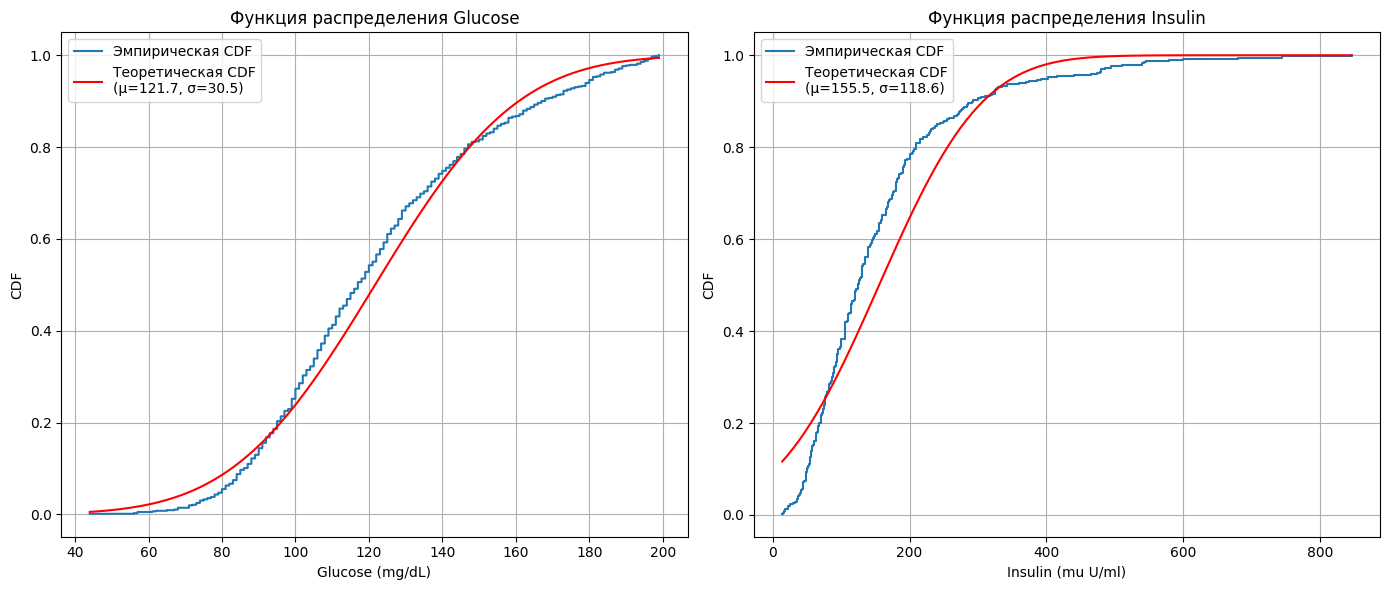

In [3]:
data = pd.read_csv('diabetes.csv')
glucose = data['Glucose'].values
insulin = data['Insulin'].values
    
plot_cdfs(glucose, insulin)
    

    # plt.figure(figsize=(10, 6))
    # sns.kdeplot(x=glucose, y=insulin, cmap='Blues', fill=True, thresh=0.05)
    # plt.title('Контурный график плотности распределения')
    # plt.xlabel('Glucose (mg/dL)')
    # plt.ylabel('Insulin (mu U/ml)')
    # plt.show()


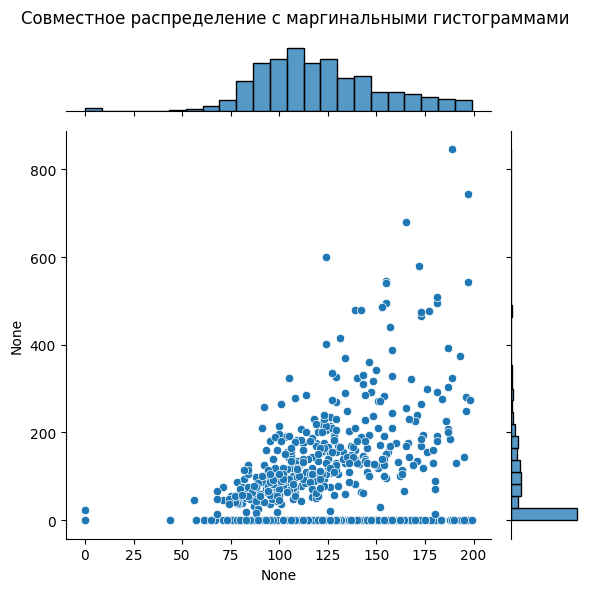

In [4]:
sns.jointplot(x=glucose, y=insulin, kind='scatter')
plt.suptitle('Совместное распределение с маргинальными гистограммами')
plt.tight_layout()
plt.show()